# Example for the Wigner-Ville distribution

In [36]:
using Winston;

In [37]:
using Color;

In [38]:
include("sampledata.jl")

sampledata

In [39]:
import sampledata

In [40]:
nsample=1024

1024

In [41]:
x,y,iw,ynorm=sampledata.genfm(nsample,1.0,0.033,10.0,100pi)

(linspace(0.0,314.1592653589793,1024),[1.0,0.917743,0.684512,0.338695,-0.0628023,-0.453934,-0.770392,-0.960188,-0.992195,-0.861244  …  -0.652234,-0.814127,-0.929369,-0.990789,-0.994257,-0.939004,-0.827738,-0.666566,-0.464706,-0.233998],[1.33,1.32998,1.32993,1.32985,1.32973,1.32958,1.32939,1.32917,1.32892,1.32863  …  0.782521,0.785047,0.787596,0.790166,0.792758,0.795371,0.798005,0.80066,0.803335,0.806031],0.01)

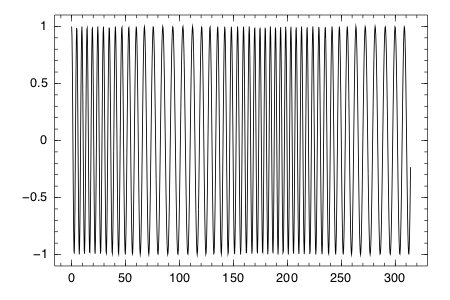

In [42]:
display(plot(x, y))

In [68]:
include("cohenclass.jl");

In [44]:
import cohenclass

In [45]:
import DSP

In [46]:
z=DSP.Util.hilbert(y);

### Wigner-Ville distribution

In [47]:
tfr=cohenclass.tfrwv(z);

Single Wigner Ville


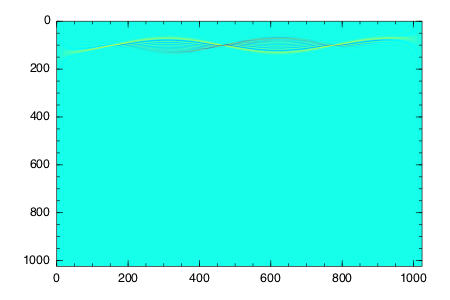

In [64]:
imagesc(real(tfr))

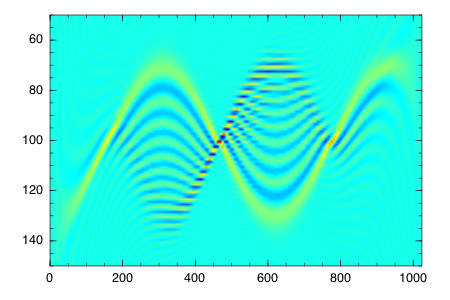

In [67]:
ylim(150,50)

In [ ]:
### use DFT instead of FFT (O(N^2)) but for aribitrary frequency. will be replaced to non-uniform FFT 

In [55]:
fin=collect(linspace(50,150,1000));

In [56]:
tfrf=cohenclass.tfrwv(z,NaN,NaN,fin,NaN,0)

Single Wigner Ville


1000x1024 Array{Complex{Float32},2}:
 1.99101+0.0im  2.12957-1.55431e-15im          …  1.74992+0.0im
 1.99101+0.0im           1.50458-0.214523im       1.74992+0.0im
 1.99101+0.0im          0.873194-0.0204724im      1.74992+0.0im
 1.99101+0.0im          0.476791+0.507876im       1.74992+0.0im
 1.99101+0.0im          0.466992+1.16855im        1.74992+0.0im
 1.99101+0.0im           0.84774+1.70904im     …  1.74992+0.0im
 1.99101+0.0im            1.4738+1.92272im        1.74992+0.0im
 1.99101+0.0im           2.10622+1.72783im        1.74992+0.0im
 1.99101+0.0im           2.50363+1.19866im        1.74992+0.0im
 1.99101+0.0im           2.51443+0.537194im       1.74992+0.0im
 1.99101+0.0im           2.13469-0.00405558im  …  1.74992+0.0im
 1.99101+0.0im           1.50966-0.218489im       1.74992+0.0im
 1.99101+0.0im          0.878302-0.0243491im      1.74992+0.0im
        ⋮                                      ⋱               
 1.99101+0.0im           2.87752+0.66817im        1.74992+0.0im
 1.

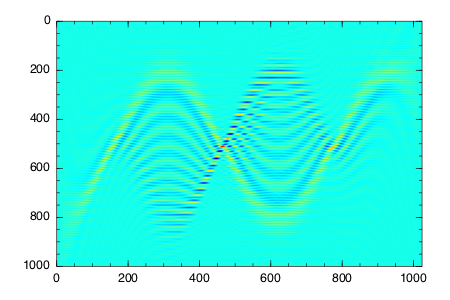

In [57]:
imagesc(real(tfrf))

### pseudo Wigner-Ville distribution using the Hamming window

In [69]:
tfrp=cohenclass.tfrpwv(z);

Single pseudo Wigner Ville


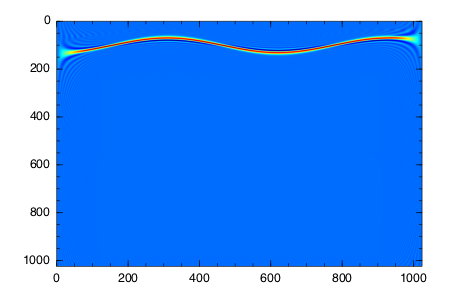

In [72]:
imagesc(real(tfrp))

In [73]:
tfrpf=cohenclass.tfrpwv(z,NaN,NaN,fin,NaN,NaN,0)

Single pseudo Wigner Ville


1000x1024 Array{Complex{Float32},2}:
 1.99101+0.0im   2.1294-1.66533e-15im          …  1.74992+0.0im
 1.99101+0.0im           1.50449-0.214494im       1.74992+0.0im
 1.99101+0.0im           0.87319-0.0204696im      1.74992+0.0im
 1.99101+0.0im          0.476841+0.507807im       1.74992+0.0im
 1.99101+0.0im          0.467044+1.16839im        1.74992+0.0im
 1.99101+0.0im           0.84774+1.7088im      …  1.74992+0.0im
 1.99101+0.0im           1.47371+1.92246im        1.74992+0.0im
 1.99101+0.0im           2.10605+1.7276im         1.74992+0.0im
 1.99101+0.0im            2.5034+1.1985im         1.74992+0.0im
 1.99101+0.0im            2.5142+0.537121im       1.74992+0.0im
 1.99101+0.0im           2.13451-0.00405502im  …  1.74992+0.0im
 1.99101+0.0im           1.50957-0.21846im        1.74992+0.0im
 1.99101+0.0im          0.878298-0.0243457im      1.74992+0.0im
        ⋮                                      ⋱               
 1.99101+0.0im           2.87724+0.668079im       1.74992+0.0im
 1.

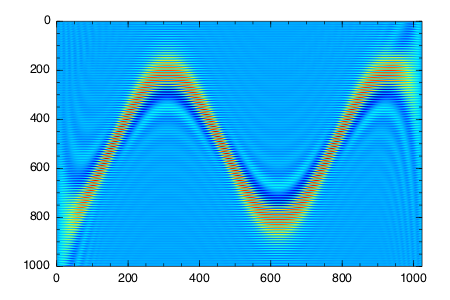

In [74]:
imagesc(real(tfrpf))

### Cross Wigner Ville distribution just for check

In [125]:
tfrc=cohenclass.tfrwv(z,z);

Cross Wigner Ville


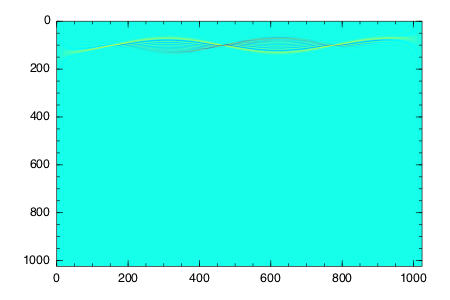

In [126]:
imagesc(real(tfrc))

### extract IF using arguments of the maximum points(maxif) and 1 st momemt (aveif)

In [127]:
include("extif.jl");

In [128]:
indfa=extif.aveif(tfr);

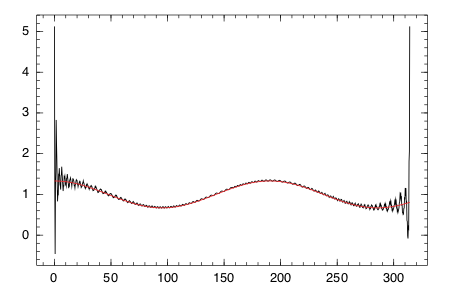

In [129]:
display(plot(x,indfa*ynorm,x,iw))

In [130]:
indfp=extif.maxif(tfrp);

In [131]:
indfpa=extif.aveif(tfrp);

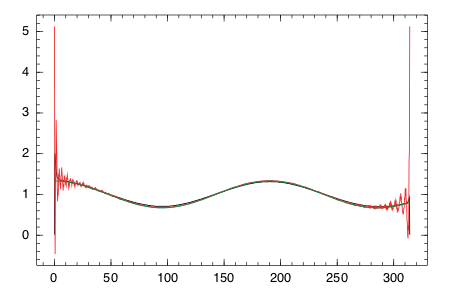

In [132]:
display(plot(x,indfp*ynorm,x,indfpa*ynorm,x,iw))

### Short Time Fourier Tranform Test

In [133]:
include("stft.jl");

In [134]:
tfrstft=stft.tfrstft(y);

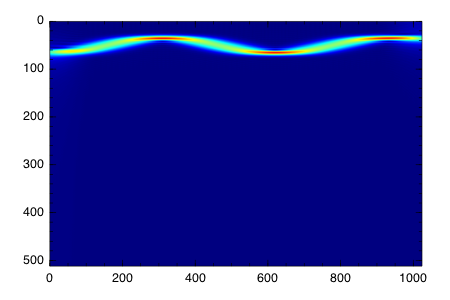

In [135]:
imagesc((abs(tfrstft))[1:round(Int,nsample/2),:])

In [136]:
indfs1=extif.aveif(real(tfrstft),1,round(Int,nsample/2));

In [137]:
indfs2=extif.maxif(real(tfrstft)[1:round(Int,nsample/2),:]);

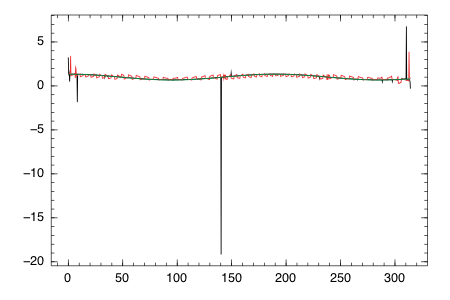

In [138]:
display(plot(x,indfs1*2*ynorm,x,indfs2*2*ynorm,x,iw))

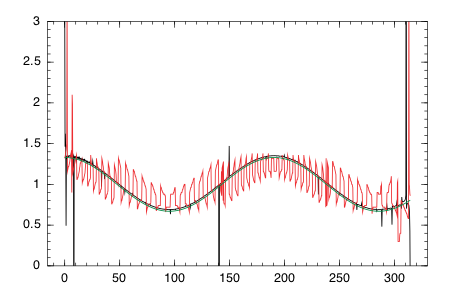

In [139]:
ylim(0,3)